Descomentar y correr estas 2 líneas solo una vez y luego borrarlas.

In [1]:
#!python -m spacy download es_core_news_sm

In [2]:
#!pip install itertools matplotlib networkx nltk numpy pandas praw pyplutchik spacy

### 1. Imports

In [3]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import numpy as np
import pandas as pd
import praw
from pyplutchik import plutchik
import spacy

### 2. Obtención de los puntajes de las emociones en el texto

In [4]:
from LexiMent import get_raw_emotion_scores

# *
# text: Texto que se analizará
# keys: Lista de emociones
# *
def get_emotions(text, keys):
    emo = get_raw_emotion_scores(text)    
    #print(emo)
    
    # Counts emotions occurrences (default is 0)
    emo = {key: int(emo[key] > 0) if key in emo else 0 for key in keys}
    #print(text)
    #print(emo)
    
    return emo

### 3. Parámetros iniciales para obtener los datos de reddit

In [5]:
reddit = praw.Reddit(client_id='xBiZuv44tJjHYTJSzW_0NQ',
                     client_secret='weyLalGpBtEYkPx1su7Gb2Y2fjBNYQ',
                     user_agent='Proyecto_Anillo/1.0')

### 4. Obtención de los post dentro de un subreddit:

In [6]:
# *
# subreddit: Subreddit en el cual se quieren buscar los post
# cantidad_posts: Cantidad de posts a buscar
# theme: Palabras claves a buscar 
# *
def get_posts_test(subreddit, cantidad_posts, theme):
    subreddit = reddit.subreddit(subreddit)
    posts = subreddit.search(theme, limit=cantidad_posts)
    #return [post.selftext for post in posts] #Retorna solo el contenido del post
    return [post.selftext if post.selftext else post.title for post in posts] #Si el post tiene contenido, lo retorna, si no, retorna el titulo

### 5. Llamada a la API para obtener los post y puntajes de las emociones

In [ ]:
subreddit = 'RepublicadeChile'  # Subreddit de interés
cantidad_posts = 10  # Número de posts a obtener
        
# Emotions
keys = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# keywords = ["Women", "Men"]
keywords = ["violencia mujer"]

for word in keywords:
    posts = get_posts_test(subreddit, cantidad_posts, word)

    #print(posts)
    print("Cantidad de Posts Encontrados: ", len(posts))

    for post in posts:
        print(post)
        print("-------------")

    tmpscore = [get_emotions(post, keys) for post in posts]

    # Average scores 
    scores = {key: np.mean([ts[key] for ts in tmpscore]) for key in keys}
    
    print("Keyword : ", word)
    print(scores)
    print("---------------------------------------------------")

    plutchik(scores)

# 6. Lectura de los Tweets en un Excel

In [8]:
from LexiMent import create_csv_from_tweets

# Ruta al archivo de Excel
excel_file_path = 'Tweets.xlsx'

# Lee el archivo de Excel en un DataFrame de pandas sin encabezados
df = pd.read_excel(excel_file_path, header=None)

# Convierte la primera columna del DataFrame en una lista
comments = df.iloc[:, 0].tolist()

# Muestra los primeros 5 comentarios como ejemplo
for i, comment in enumerate(comments[:5]):
    print(f'Comentario {i+1}: {comment}\n')

#Función opcional para genrar 2 archivos .csv con el listado de palabras, emociones, y tipo de palabra.
#create_csv_from_tweets(comments)

Comentario 1: Cuestionar la IDONEIDAD de nuestro Ministro de Educación, dejando entrever que su ORIENTACIÓN SEXUAL es un SESGO para ejercer sus labores de "manera adecuada", es HOMOFOBIA, por donde se mire. Quieran hablar de "gestión o pendientes", eso es solo humo para cubrir esa ODIOSIDAD.

Comentario 2: La Educación Sexual Integral es una necesidad social que debe resolver la escuela, porque No todos los niños y niñas tienen una buena educación en sus familias (pueden no tener familia incluso) o ser abusados dentro de la familia. La ESI les ayuda de entender qué es el abuso

Comentario 3: Vivir la homofobia en plena educación escolar es horrible. Esto es lo que se necesita para terminar con la violencia contra estudiantes LGBTQ+, que muchas veces tiene espacios en el bullying. No son "leseras" ni "ideologías", son acciones para terminar con la discriminación! 

Comentario 4: El nivel de odio y homofobia en esta “interpelación” ufffff y los gays de derecha? Van a defender esto? Porq 

# 7. [Gráfico 1] Rosa de Plutchik

{'anger': 0.4700854700854701, 'anticipation': 0.39316239316239315, 'disgust': 0.36752136752136755, 'fear': 0.47863247863247865, 'joy': 0.2222222222222222, 'sadness': 0.4700854700854701, 'surprise': 0.15384615384615385, 'trust': 0.46153846153846156}


<Axes: >

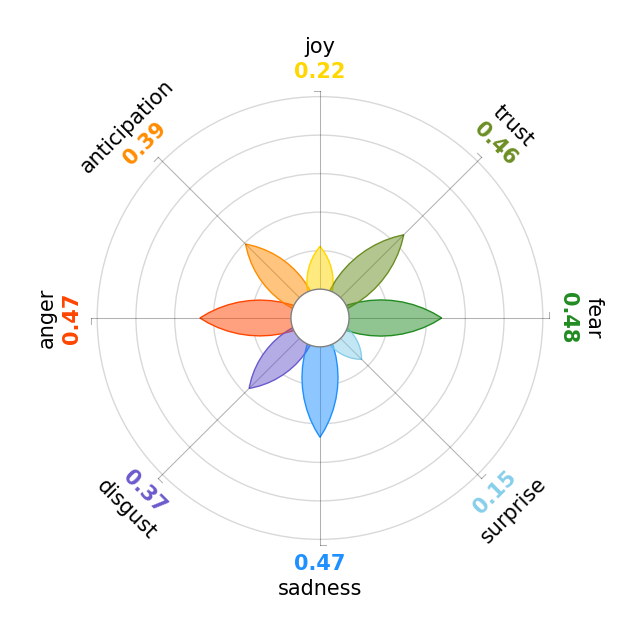

In [9]:
# Emotions
keys = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
# keys = ['enojo', 'anticipación', 'repugnancia', 'miedo', 'alegría', 'tristeza', 'sorpresa', 'confianza']

tmpscore = [get_emotions(post, keys) for post in comments]

#Ver como se distribuyeron las emociones en cada comentario (Primeros 5)
# i=0
# for aux in tmpscore[:5]:
#     print('{}: {}\n{}\n'.format(i+1, comment, aux))
#     i+=1

# Average scores 
scores = {key: np.mean([ts[key] for ts in tmpscore]) for key in keys}    
print(scores)

plutchik(scores)

# 8. [Gráfico 2] Rosa de Plutchik : Diadas Primarias

Enfocamos la representación de las diadas primarias calculando el promedio de los valores de las emociones que las conforman.

<Axes: >

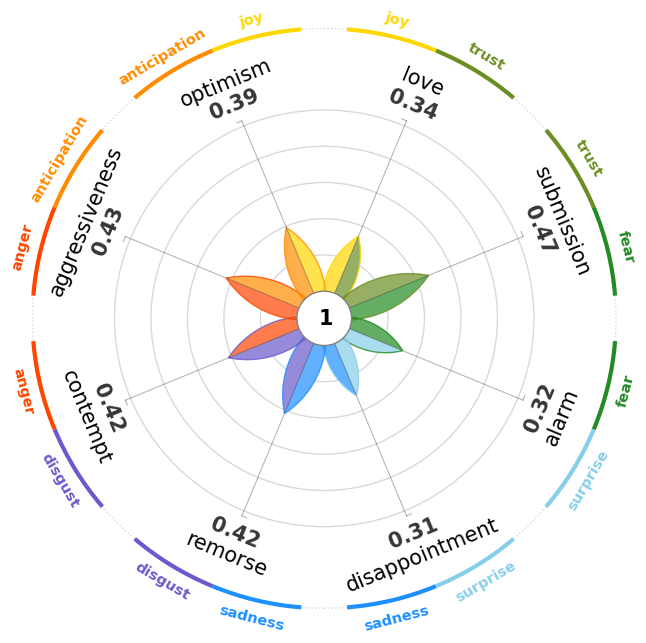

In [10]:
emotions = scores

love = (emotions["joy"] + emotions["trust"]) / 2
submission = (emotions["trust"] + emotions["fear"]) / 2
alarm = (emotions["fear"] + emotions["surprise"]) / 2
disappointment = (emotions["surprise"] + emotions["sadness"]) / 2
remorse = (emotions["sadness"] + emotions["disgust"]) / 2
contempt = (emotions["disgust"] + emotions["anger"]) / 2
aggressiveness = (emotions["anger"] + emotions["anticipation"]) / 2
optimism = (emotions["anticipation"] + emotions["anticipation"]) / 2

prymary_diads = {"love": love,
                 "submission" : submission,
                 "alarm": alarm,
                 "disappointment" : disappointment,
                 "remorse" : remorse,
                 "contempt": contempt,
                 "aggressiveness": aggressiveness,
                 "optimism": optimism}


plutchik(prymary_diads)

# 9. Creación de los Grafos

In [34]:
from LexiMent import get_lexicon

%matplotlib inline

# Cargar el modelo de lenguaje de spaCy
nlp = spacy.load("es_core_news_sm")

#Conjunto de palabras a utilizar
valsexpan = set(get_lexicon())

#Lista de relaciones a excluir:
excl_rel = ["det", "aux", "prep", "expl:pv", "case", "ROOT", "cc"]

#Lista de puntuaciones y isgnos a excluir
excl_punt_sign = ['.', ',', ':', ';', '¿', '?', '(', ')', '!', '¡','"']

#Lista de palabras junto con la cantidad de veces que aparece
count_words = {}

#Listas de grafos
graphpos = []
graphneg = []
graphcol = []

for text in comments:
    #Paso 1: Analizar el texto
    doc = nlp(text)

    #Pasos 2 y 3: Crear el grafo inicial
    reg = nx.Graph()
    for relacion in doc:
        if relacion.dep_ not in excl_rel: #Paso 2.1 Exluyo algunas relaciones (preposiciones, verbos auxiliares, entre otros)
            if relacion.text not in excl_punt_sign: #Excluyo signos de puntuación
                reg.add_edge(relacion.head.lemma_.lower(), relacion.lemma_.lower(), tipo=relacion.dep_) #Paso 2.2 Lemmatizar y Paso 3: Generar vertices/aristas del grafo
                if relacion.head.lemma_.lower() not in count_words:
                    count_words[relacion.head.lemma_.lower()] = 1
                else:
                    count_words[relacion.head.lemma_.lower()] = count_words[relacion.head.lemma_.lower()] + 1                

    #Paso 4: Obtener conjunto de nodos finales sin repetir
    ly0 = set(reg.nodes())

    #Paso 5: Palabras que están en ly0 y en valexpan
    wordsto = ly0.intersection(valsexpan)

    #Paso 6: Generar todas las combinaciones únicas de elementos en el conjunto
    couples = list(combinations(wordsto, 2))

    #Paso 7: Encontrar un path dentro del grafo entre cada par de nodos de la lista "couples"
    paths_total = []
    for node1, node2 in couples:
        try:
            paths_temp = nx.all_shortest_paths(reg, source=node1, target=node2)
            for path in paths_temp:
                paths_total.append(path)
        except nx.NetworkXNoPath:
            continue

    #Paso 8: Crear lista solo con los path de longitud igual o menor a 3
    paths = [path for path in paths_total if len(path) <=3]

    #Paso 9: Almaceno aquellos path que no tienen la palabara "no"
    affpath = [p for p in paths if 'no' not in p]

    #Paso 10: Almaceno aquellos path que tienen la palabara "no"
    negpath = [p for p in paths if 'no' in p]

    #Paso 11: De los path "positivos", guardo solo el nodo inicial y final de cada path
    affsemlin = [(path[0], path[-1]) for path in affpath]

    #Paso 12: De los path "negativos", guardo solo el nodo inicial y final de cada path
    negsemlin = [(path[0], path[-1]) for path in negpath]

    #Paso 13: Generar un grafo donde los nodos sean wordsto y los enlaces sean de affsemlin
    afntw = nx.DiGraph()
    # Agregar nodos
    for palabra in wordsto:
        afntw.add_node(palabra)

    # Agregar enlaces basados en nodos iniciales y finales
    for inicio, final in affsemlin:
        if inicio in wordsto and final in wordsto:
            afntw.add_edge(inicio, final)

    #Paso 14: Generar un grafo donde los nodos seann wordsto y los enlaces sean de negsemlin
    nentw = nx.DiGraph()
    # Agregar nodos
    for palabra in wordsto:
        nentw.add_node(palabra)

    # Agregar enlaces basados en nodos iniciales y finales
    for inicio, final in negsemlin:
        if inicio in wordsto and final in wordsto:
            nentw.add_edge(inicio, final)

    #Paso 15: Generar un grafo donde los nodos seann wordsto y los enlaces sean de affsemlin + negsemlin
    totsemlin = affsemlin + negsemlin
    totntw = nx.DiGraph()
    # Agregar nodos
    for palabra in wordsto:
        totntw.add_node(palabra)

    # Agregar enlaces basados en nodos iniciales y finales
    for inicio, final in totsemlin:
        if inicio in wordsto and final in wordsto:
            totntw.add_edge(inicio, final)
    
    #Paso final del bucle: Agrego cada grafo final a una lista de grafos
    graphpos.append(afntw)
    graphneg.append(nentw)
    graphcol.append(totntw)

HOLAAAAAA


# 10. [Gráfico 3] Grafo de Relaciones simple

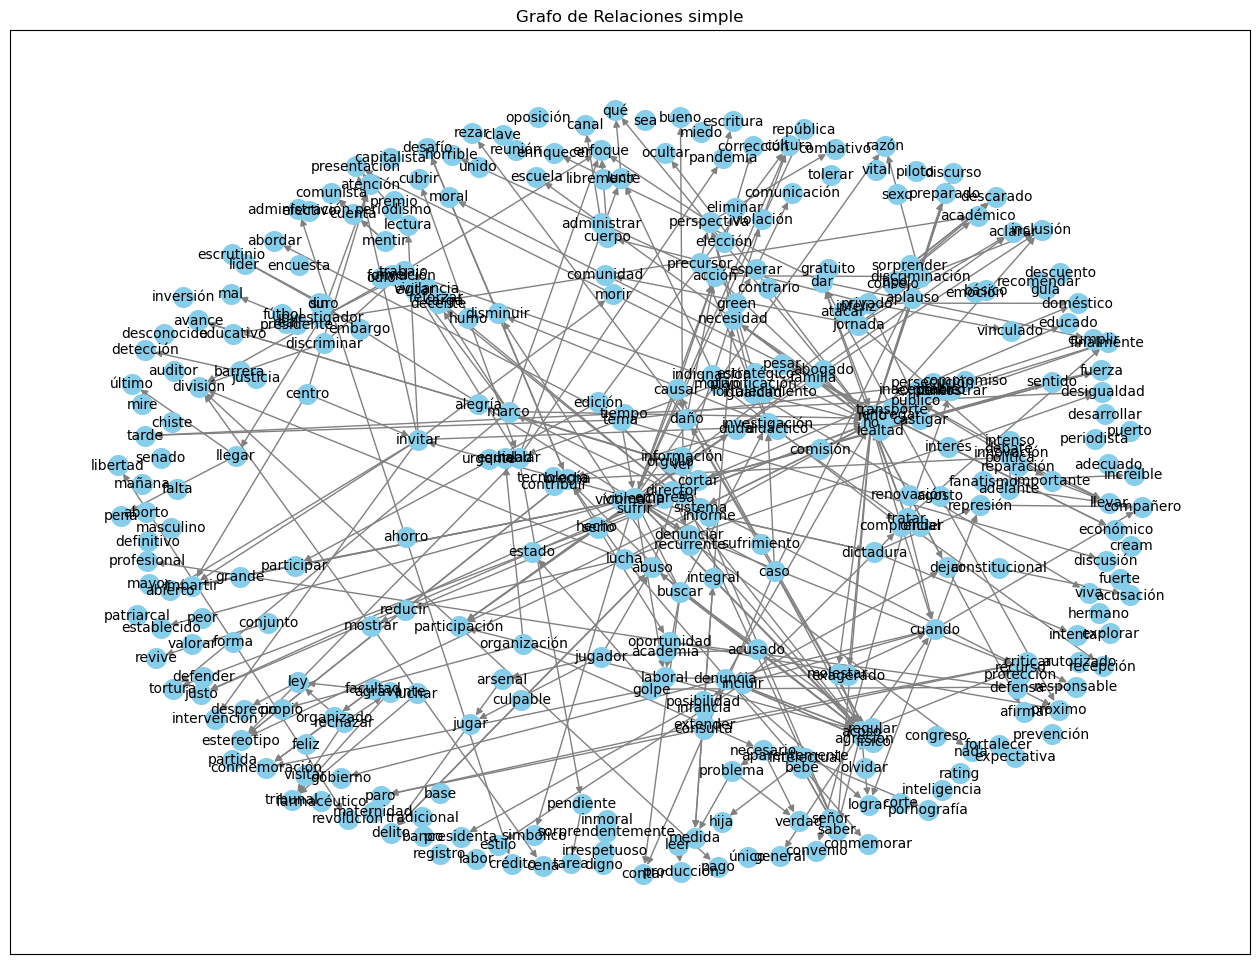

In [26]:
from LexiMent import get_list_polarity

#Lista de palabras según si polaridad (Negatva, Positiva y Neutra)
neg2 = get_list_polarity("negative")
pos2 = get_list_polarity("positive")
neu2 = get_list_polarity("neutro")

#Paso 16: Crear el grafo final (Vértices = todos los vértices de cada grafo de graphcol, aristas = todas las aristas de cada grafo de graphcol)
gmer = nx.compose_all(graphcol)

#Visualizar el grafo en Jupyter Notebook
#pos = nx.circular_layout(gmer) #Visualización Circular
pos = nx.spring_layout(gmer) #Visualización "Normal"
labels = {n: n for n in gmer.nodes()}

plt.figure(figsize=(16, 12))
nx.draw_networkx(gmer, pos, with_labels=True, labels=labels, node_size=200, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
plt.title("Grafo de Relaciones simple")
plt.show()

# 11. [Gráfico 4] Grafo de Relaciones Reducido, Coloreado y Personalizado

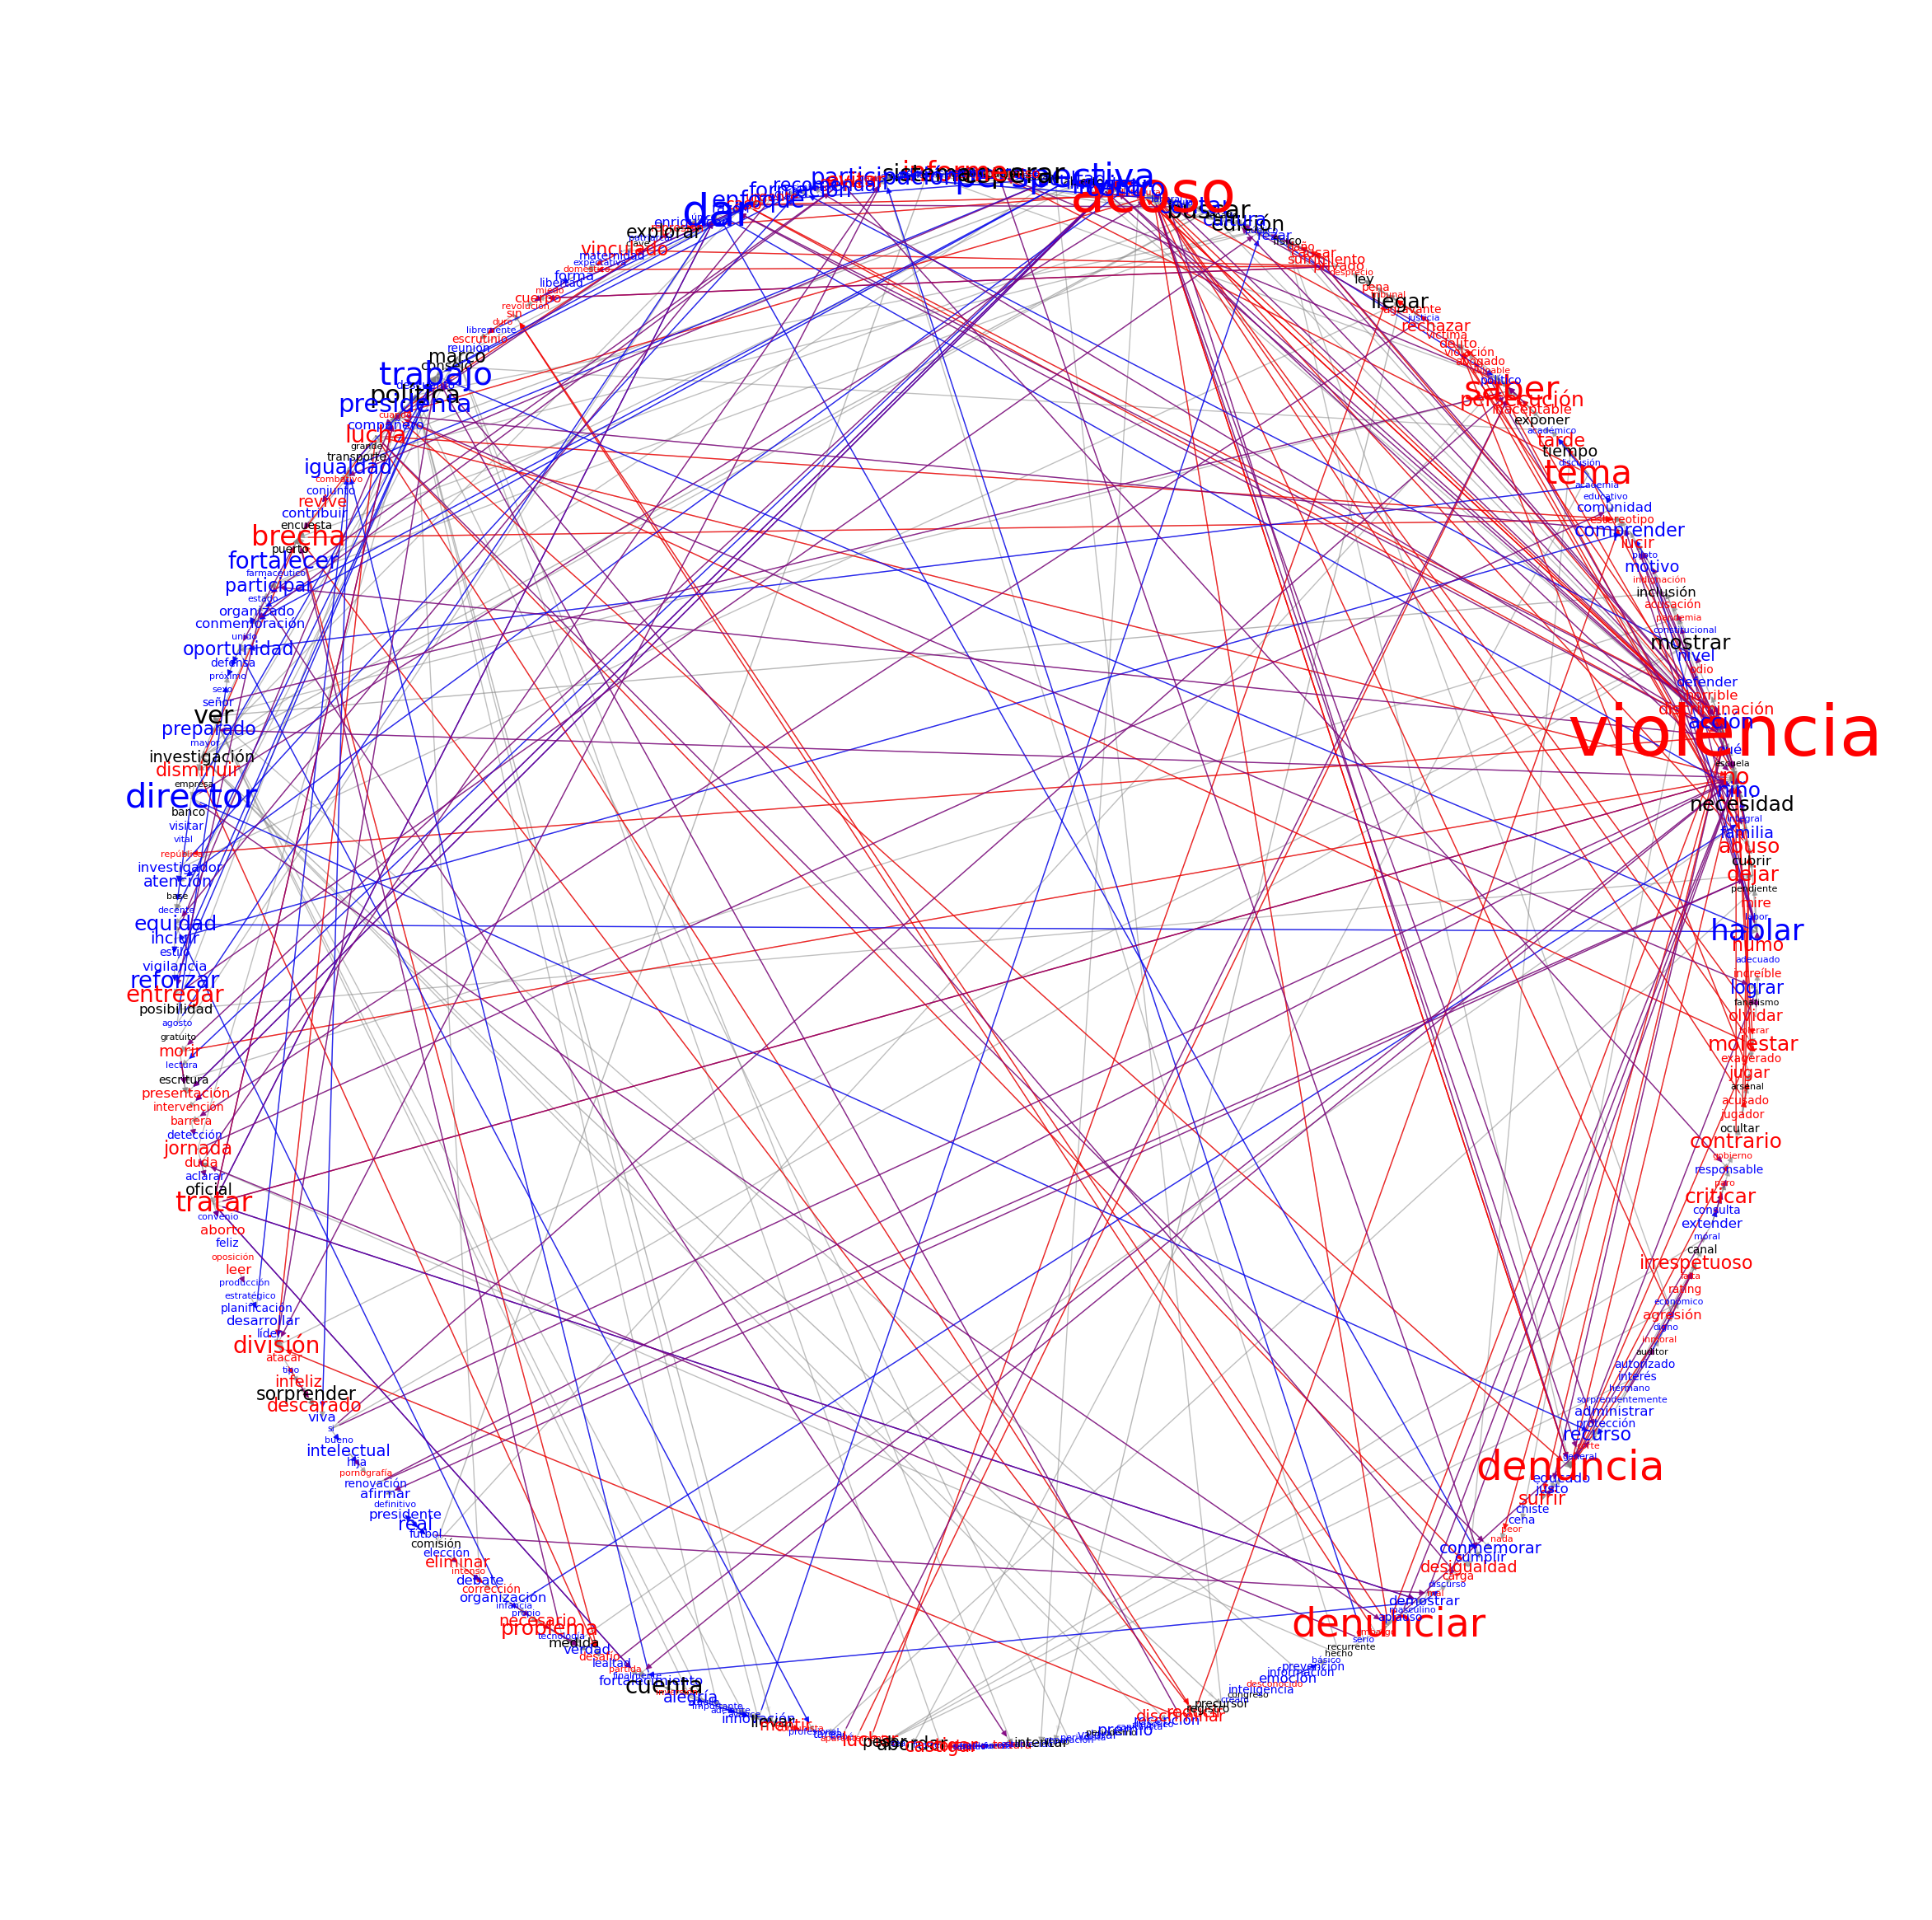

In [27]:
#Paso 17: Trabajo futuro -> Generar grafo de sinónimos

# #Paso 18 y 19: Definir color azul y purpura (en caso de querer personalizar colores)
# color1 = (0.01, 0.5, 1) #Azul
# color2 = (0.95, 0.1, 0.05) #Púrpura

#Paso 20: Definir función que personaliza los textos (etiquetas)
def panel_label(lbl):
    count = 0
    if lbl in count_words:
        count = count_words[lbl]
    if lbl == "no":
        return {'label': lbl, 'color': 'red', 'font_size': 20}
    elif lbl in neg2:
        return {'label': lbl, 'color': 'red', 'font_size': (8 + 2*count)}
    elif lbl in pos2:
        return {'label': lbl, 'color': 'blue', 'font_size': (8 + 2*count)}
    else:
        return {'label': lbl, 'color': 'black', 'font_size': (8 + 2*count)}

#Paso 21: Almaceno las aristas del grafo final
e1 = gmer.edges()

#Paso 22: Almaceno las aristas del grafo final que van de palabra negativa a palabra negativa
negneg = [edge for edge in e1 if edge[0] in neg2 and edge[1] in neg2]
#print(negneg)

#Paso 23: Almaceno las aristas del grafo final que van de palabra positiva a palabra positiva
pospos = [edge for edge in e1 if edge[0] in pos2 and edge[1] in pos2]
#print(pospos)

#Paso 24: Almaceno las aristas del grafo final que van de palabra neutra a palabra neutra
neuneu = [edge for edge in e1 if edge[0] in neu2 and edge[1] in neu2]
#print(neuneu)

#Paso 25: Almaceno las aristas del grafo final que van de palabra positiva a palabra negativa o al revés
negpos = [edge for edge in e1 if ((edge[0] in neg2 and edge[1] in pos2) or (edge[0] in pos2 and edge[1] in neg2))]
#print(negpos)


# Crear el grafo og
og = nx.Graph()
og = gmer
pos = nx.circular_layout(og) #Grafo Circular
#pos = nx.spring_layout(og) #Grafo Normal

# Crear el dibujo del grafo
fig, ax = plt.subplots(figsize=(30, 30))


# Dibujar nodos
for node, (x, y) in pos.items():
    ax.scatter(x, y, s=0)
    label_attrs = panel_label(node)
    ax.text(x, y, label_attrs['label'], color=label_attrs['color'], fontsize=label_attrs['font_size'],
            ha='center', va='center')

# Dibujar aristas con diferentes atributos
nx.draw(og, pos, ax=ax, node_size=0, width=1, alpha=0.5, edge_color='gray')

for e in neuneu:
    nx.draw_networkx_edges(og, pos, edgelist=[e], ax=ax, edge_color='gray', alpha=0.1, width=1)

for e in negneg:
    nx.draw_networkx_edges(og, pos, edgelist=[e], ax=ax, edge_color='red', alpha=0.8, width=1)

for e in pospos:
    nx.draw_networkx_edges(og, pos, edgelist=[e], ax=ax, edge_color='blue', alpha=0.8, width=1)

for e in negpos:
    nx.draw_networkx_edges(og, pos, edgelist=[e], ax=ax, edge_color='purple', alpha=0.8, width=1)

# Eliminar ejes
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el gráfico
plt.show()


# 12. Algoritmo de Louvain

DiGraph with 349 nodes and 410 edges
Número de comunidades detectadas: 78
Comunidad mas grande :  231


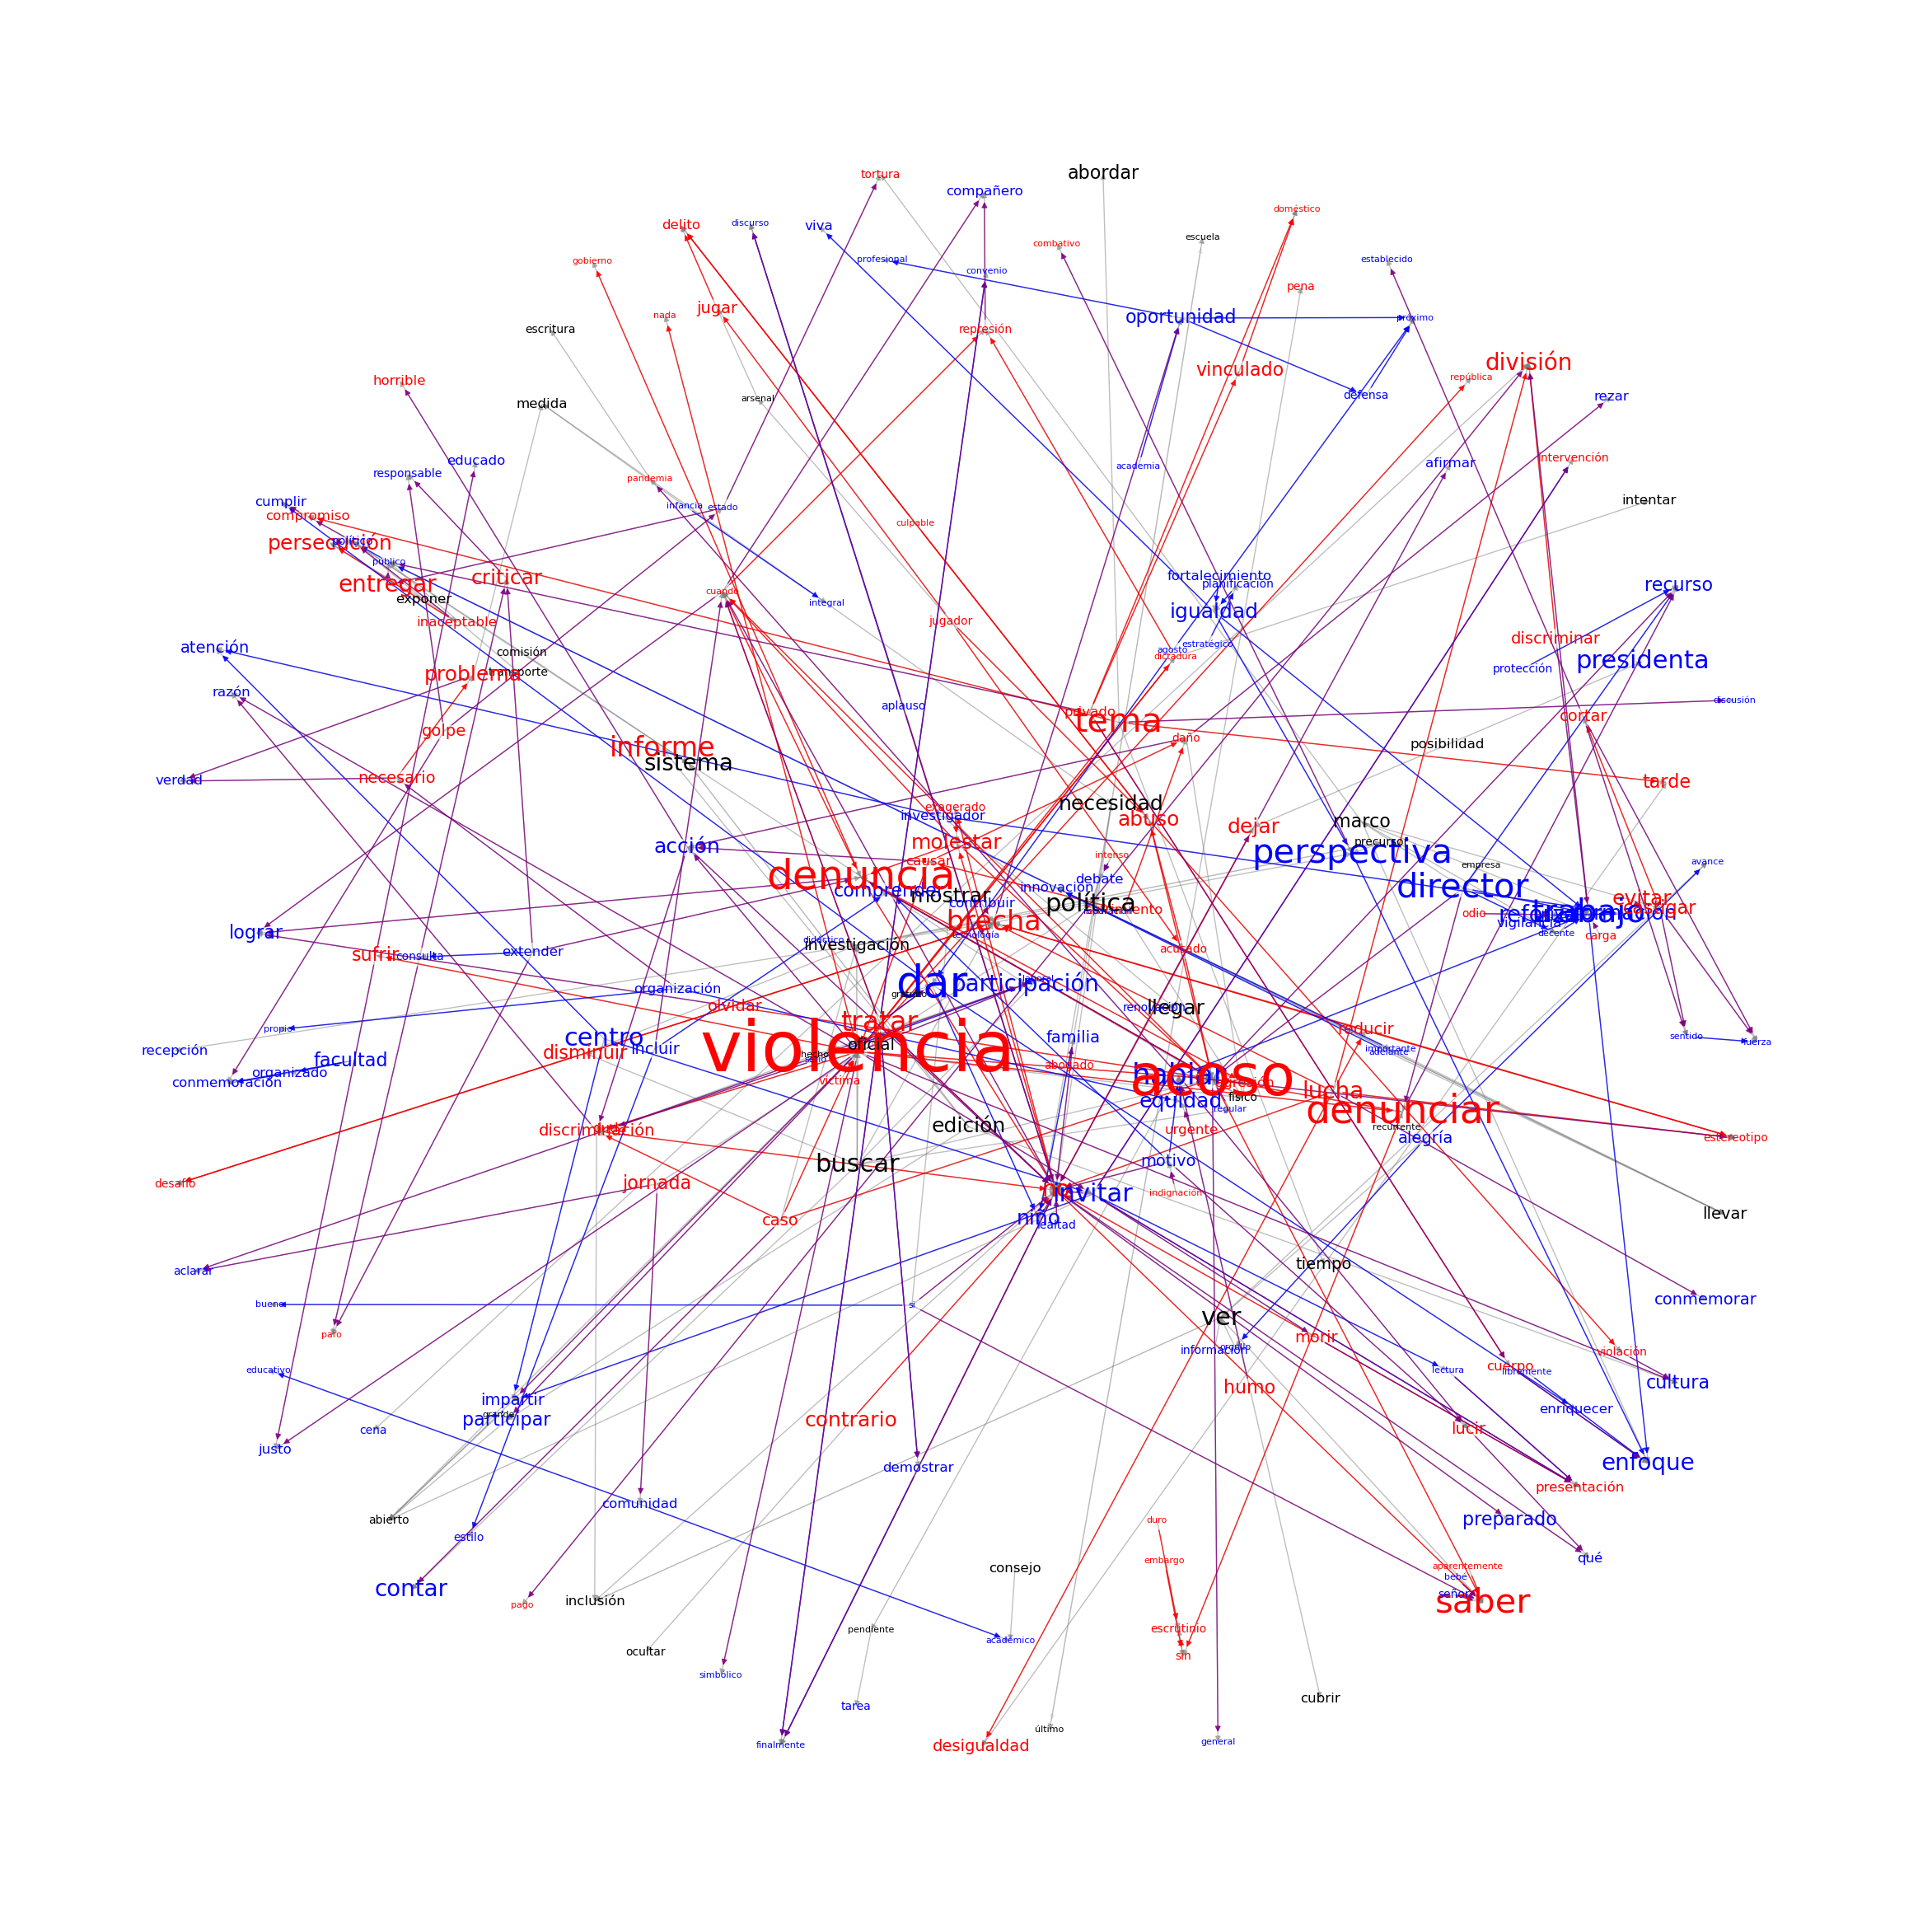

In [28]:
import networkx.algorithms.community as nx_comm
import matplotlib.colors as mcolors

G = gmer
#pos = nx.circular_layout(G) #Grafo Circular
pos = nx.spring_layout(G) #Grafo Normal
print(G)
communities = nx_comm.louvain_communities(G, resolution=0, seed=123)
#print(communities)
print(f"Número de comunidades detectadas: {len(communities)}")
#print(f"Tamaño de las comunidades detectadas: {[len(comunidad) for comunidad in communities]}")


#---------------------------- Graficar todos los subgrafos --------------------------
# communities_map = {}
# for i in range(len(communities)):
#     communities_map.update(dict.fromkeys(communities[i], i))
    
# color_pallet = list(mcolors.TABLEAU_COLORS.values())*20 #Cantidad por defecto: 10
# node_colors = []
# for node in G:
#     node_colors.append(color_pallet[communities_map[node]])

# fig, ax = plt.subplots(figsize=(20, 20))
# nx.draw(G, ax=ax, node_color=node_colors, with_labels=True)
# plt.show()

#--------------------------- Graficar el grafo mas conectado ------------------------

# Encuentras la comunidad más grande
largest_community = max(communities, key=len)
print("Comunidad mas grande : ", len(largest_community))

# Creas un nuevo grafo solo con los nodos de la comunidad más grande
largest_community_subgraph = G.subgraph(largest_community)

# Crear el grafo og
nog = nx.Graph()
nog = largest_community_subgraph
#pos = nx.circular_layout(nog) #Grafo Circular
pos = nx.spring_layout(nog) #Grafo Normal

# Crear el dibujo del grafo
fig, ax = plt.subplots(figsize=(30, 30))


# Dibujar nodos
for node, (x, y) in pos.items():
    ax.scatter(x, y, s=0)  # Dibujar nodo invisible
    label_attrs = panel_label(node)
    ax.text(x, y, label_attrs['label'], color=label_attrs['color'], fontsize=label_attrs['font_size'],
            ha='center', va='center')

# Dibujar aristas con diferentes atributos
nx.draw(nog, pos, ax=ax, node_size=0, width=1, alpha=0.5, edge_color='gray')

for e in neuneu:
    if e[0] in nog.nodes() and e[1] in nog.nodes() :
        nx.draw_networkx_edges(nog, pos, edgelist=[e], ax=ax, edge_color='gray', alpha=0.1, width=1)

for e in negneg:
    if e[0] in nog.nodes() and e[1] in nog.nodes() :
        nx.draw_networkx_edges(nog, pos, edgelist=[e], ax=ax, edge_color='red', alpha=0.8, width=1)

for e in pospos:
    if e[0] in nog.nodes() and e[1] in nog.nodes() :
        nx.draw_networkx_edges(nog, pos, edgelist=[e], ax=ax, edge_color='blue', alpha=0.8, width=1)

for e in negpos:
    if e[0] in nog.nodes() and e[1] in nog.nodes() :
        nx.draw_networkx_edges(nog, pos, edgelist=[e], ax=ax, edge_color='purple', alpha=0.8, width=1)

# for e in gsyn.edges():
#     nx.draw_networkx_edges(og, pos, edgelist=[e], ax=ax, edge_color='green', alpha=0.8, width=0.018)

# Eliminar ejes
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el gráfico
plt.show()

# 13. Generación de Archivos con nodos y relaciones finales

In [42]:
import csv
nodos = list(nog.nodes())
with open('Nodos_Finales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Nodo', 'Polaridad', '#Veces_Aparece'])  # Encabezado
    for nodo in G.nodes():
        polaridad = "neutro"
        contador = 1
        if nodo in count_words:
            contador = count_words[nodo]
        if nodo in neg2:
            polaridad = "negativo"
        elif nodo in pos2:
            polaridad = "positivo"
        writer.writerow([nodo, polaridad, contador])

In [43]:
import csv
relaciones = list(nog.edges())
with open('Relaciones_Finales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NodoInicio', 'NodoFin'])  # Encabezado
    writer.writerows(relaciones)